**本篇属于神经网络实战，不存在基础性的原理性的代码**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

D:\ProgramData\Anaconda3\envs\study_py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\ProgramData\Anaconda3\envs\study_py37\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
D:\ProgramData\Anaconda3\envs\study_py37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


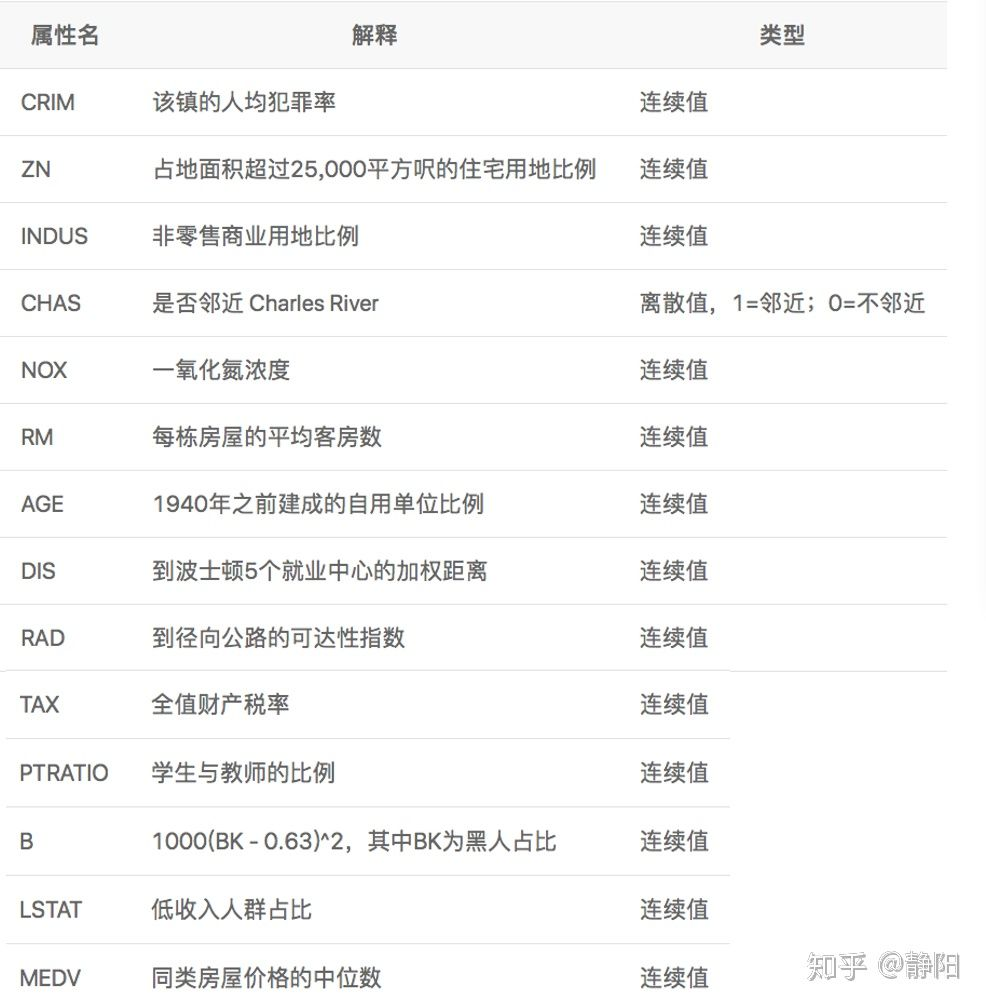

In [51]:
# 读入训练数据
datafile = './data_watermelon/housing.data'#此处为自己的地址
data = np.fromfile(datafile, sep=' ')
data

array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

In [52]:
# 读入之后的数据被转化成1维array，其中array的第0-13项是第一条数据，第14-27项是第二条数据，以此类推.... 
# 这里对原始数据做reshape，变成N x 14的形式
feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [53]:
# 对自变量进行归一化处理
data_mean, data_max, data_min = data.mean(axis=0), data.max(axis=0), data.min(axis=0)
for i in range(feature_num - 1):
        data[:, i] = (data[:, i] - data_mean[i]) / (data_max[i] - data_min[i])
data_x = data[:, 0:-1]
data_y = data[:, -1]
data

array([[-4.05440983e-02,  6.63636364e-02, -3.23562267e-01, ...,
         1.01432166e-01, -2.11729118e-01,  2.40000000e+01],
       [-4.03081757e-02, -1.13636364e-01, -1.49075464e-01, ...,
         1.01432166e-01, -9.69388312e-02,  2.16000000e+01],
       [-4.03084005e-02, -1.13636364e-01, -1.49075464e-01, ...,
         9.11694195e-02, -2.37943246e-01,  3.47000000e+01],
       ...,
       [-3.99322058e-02, -1.13636364e-01,  2.90770287e-02, ...,
         1.01432166e-01, -1.93517198e-01,  2.39000000e+01],
       [-3.93833684e-02, -1.13636364e-01,  2.90770287e-02, ...,
         9.27327863e-02, -1.70338390e-01,  2.20000000e+01],
       [-4.00822566e-02, -1.13636364e-01,  2.90770287e-02, ...,
         1.01432166e-01, -1.31707043e-01,  1.19000000e+01]])

In [6]:
# 划分训练数据集和测试数据集
x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.2, shuffle= False)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


**直接用神经网络进行处理**

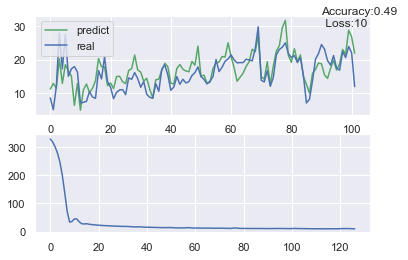

In [33]:
regr = MLPRegressor(solver='sgd', hidden_layer_sizes=(10), random_state=14, max_iter = 2000)
regr.fit(x_train,y_train) #拟合
y_predict = regr.predict(x_test)
score = regr.score(x_test, y_test,sample_weight=None)
# print('Accuracy:',score)
# print('Loss:',regr.loss_)
plt.subplot(211)
plt.plot(range(len(y_test)), y_predict, c='g', label='predict')
plt.plot(range(len(y_test)), y_test, c='b', label='real')
plt.annotate(f'Accuracy:{round(score, 2)} \n Loss:{round(regr.loss_)}', (90,30))
plt.legend()
plt.subplot(212)
plt.plot(range(regr.n_iter_), regr.loss_curve_)

**此处开始引入相关性分析，挑选相关性高的参数参与拟合**

In [15]:
import seaborn as sns
import pandas as pd

In [55]:
data_pd = pd.DataFrame(data, columns=feature_names)
data_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,24.0
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,21.6
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,34.7
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,33.4
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.039911,-0.113636,0.029077,-0.06917,0.037664,0.059085,0.005408,-0.119710,-0.371713,-0.258086,0.270688,0.089051,-0.082314,22.4
502,-0.040106,-0.113636,0.029077,-0.06917,0.037664,-0.031545,0.083678,-0.137088,-0.371713,-0.258086,0.270688,0.101432,-0.098594,20.6
503,-0.039932,-0.113636,0.029077,-0.06917,0.037664,0.132471,0.230948,-0.148000,-0.371713,-0.258086,0.270688,0.101432,-0.193517,23.9
504,-0.039383,-0.113636,0.029077,-0.06917,0.037664,0.097598,0.213441,-0.127867,-0.371713,-0.258086,0.270688,0.092733,-0.170338,22.0


#### 最简单的相关性计算

<AxesSubplot:>

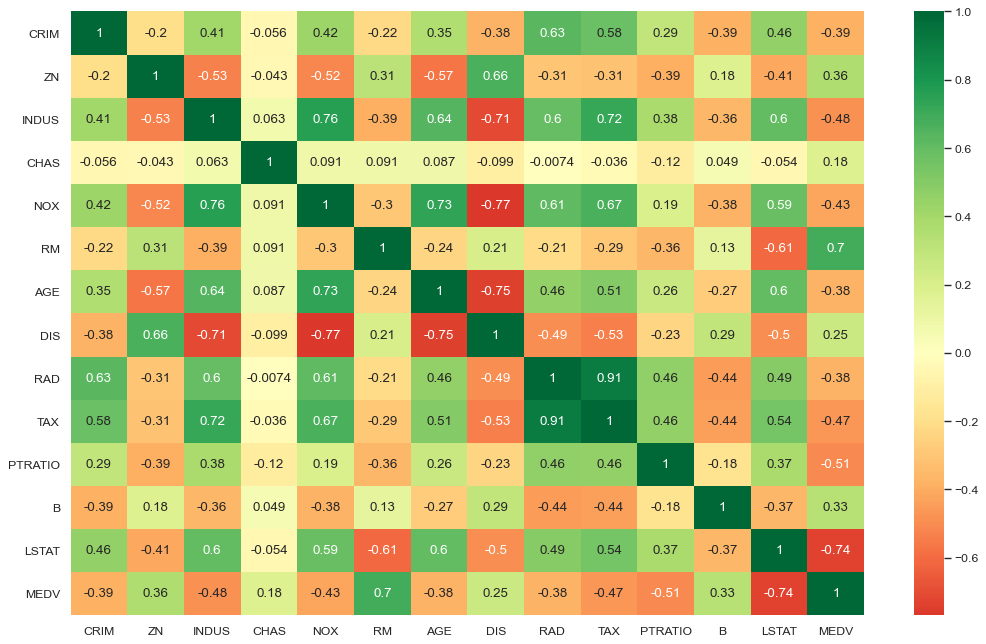

In [57]:
corr = data_pd.corr()
plt.figure(figsize=(16,10), dpi= 80)
# 相关性大小计算
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', center=0, annot=True)

In [ ]:
corr_1 = corr.iloc[-1, 0:-1]
corr_1

In [34]:
# 选择大于x的几个特征,结果居然是全选精确度最高
indexs = []
for i, c in enumerate(corr_1):
    if abs(c) > 0:
        indexs.append(i)
indexs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

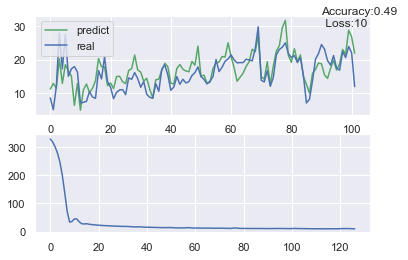

In [35]:
regr = MLPRegressor(solver='sgd', hidden_layer_sizes=(10), random_state=14, max_iter = 2000)
regr.fit(x_train[:, indexs],y_train) #拟合
y_predict = regr.predict(x_test[:, indexs])
score = regr.score(x_test[:, indexs], y_test,sample_weight=None)
# print('Accuracy:',score)
# print('Loss:',regr.loss_)
plt.subplot(211)
plt.plot(range(len(y_test)), y_predict, c='g', label='predict')
plt.plot(range(len(y_test)), y_test, c='b', label='real')
plt.annotate(f'Accuracy:{round(score, 2)} \n Loss:{round(regr.loss_)}', (90,30))
plt.legend()
plt.subplot(212)
plt.plot(range(regr.n_iter_), regr.loss_curve_)

#### 任意看两个数据之间相关性可视化

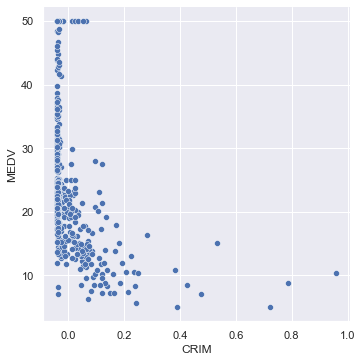

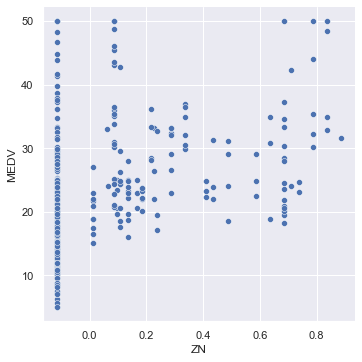

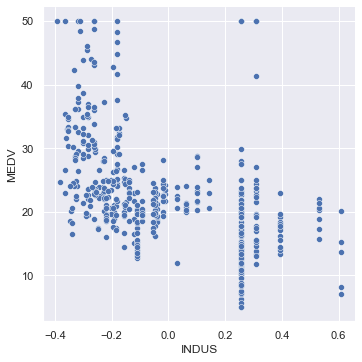

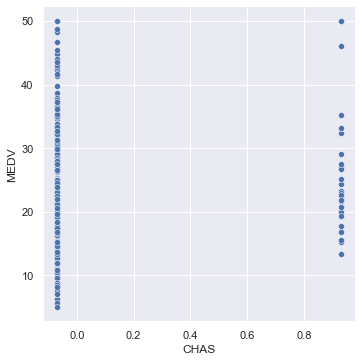

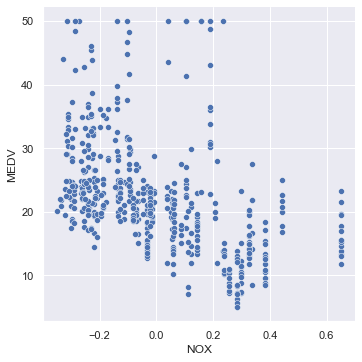

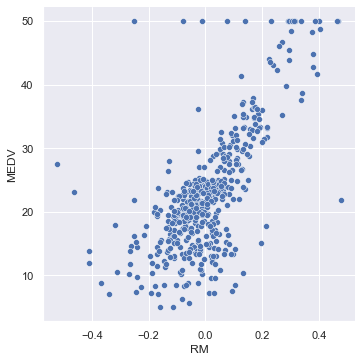

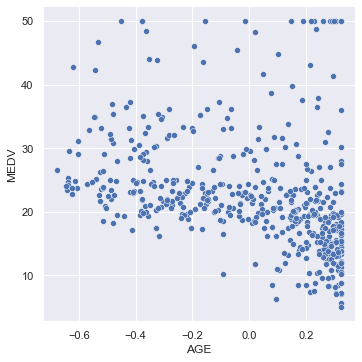

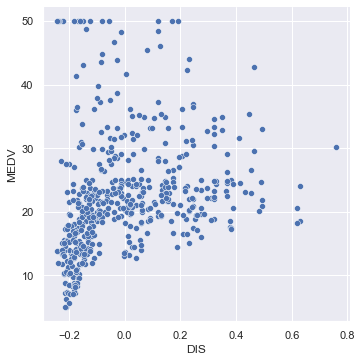

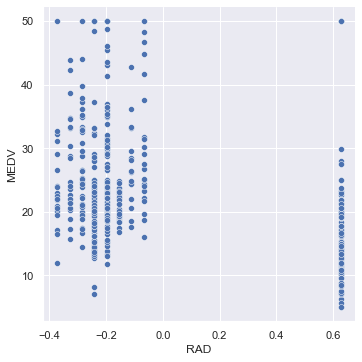

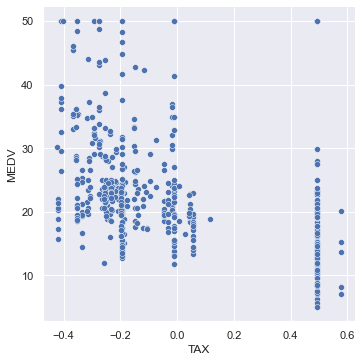

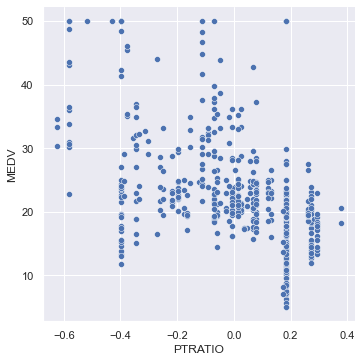

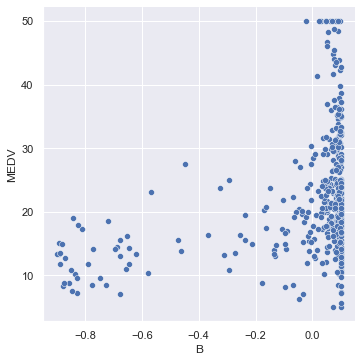

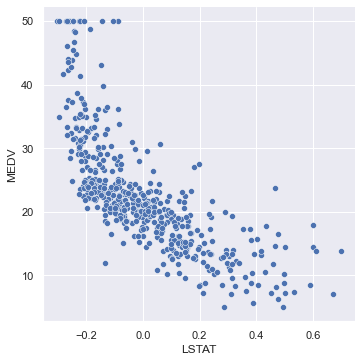

In [49]:
for i in range(feature_num - 1):
    sns.relplot(x=data_pd.columns[i], y=data_pd.columns[feature_num-1], data=data_pd)
#     plt.show()
# sns.relplot(x=data_pd.columns[0], y=data_pd.columns[feature_num-1], data=data_pd)

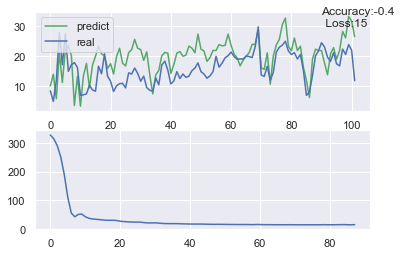

In [56]:
indexs=[5, 12]
regr = MLPRegressor(solver='sgd', hidden_layer_sizes=(10), random_state=14, max_iter = 2000)
regr.fit(x_train[:, indexs],y_train) #拟合
y_predict = regr.predict(x_test[:, indexs])
score = regr.score(x_test[:, indexs], y_test,sample_weight=None)
# print('Accuracy:',score)
# print('Loss:',regr.loss_)
plt.subplot(211)
plt.plot(range(len(y_test)), y_predict, c='g', label='predict')
plt.plot(range(len(y_test)), y_test, c='b', label='real')
plt.annotate(f'Accuracy:{round(score, 2)} \n Loss:{round(regr.loss_)}', (90,30))
plt.legend()
plt.subplot(212)
plt.plot(range(regr.n_iter_), regr.loss_curve_)